# Trigger Efficiency

**Goal:** Plot the $p_T$ of the $b$-jets split by triggers.

I think we were mostly interested in doing this for the signal because we trying to fill out the story of what the topology of the events were that we were passing or failing.

But I think this will *also* be useful to compare for background as well.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import uproot

import os
import sys
sys.path.append("../code")
from preprocess import read_tsv, fileDir, yr_short, triggers
from plotting import varEvolution, massPlane

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
btags = '4b'
physicsSample = 'SMNR'
nFiles = 1

trigger = '2016_triggers'

In [3]:
year = int(trigger[:4])

if 'data' in physicsSample:
    subDir = physicsSample
else: 
    if 'triggers' in trigger:
        subDir = '{}_{}'.format(physicsSample,yr_short[year])
    else:
        for year in [2015,2016]:
            if trigger in triggers[year]:
                subDir = '{}_{}'.format(physicsSample,yr_short[year])
                
figDir = "../figures/{}{}/{}".format("2b_" if btags == '2b' else '', subDir,trigger)
    

In [4]:
fDir = "../data/{}_PFlow/".format(physicsSample)

fs = {15 : 0.22, 16 : 0.16}

if physicsSample == 'SMNR':
    
    c_evt = 'C4'
    title = "{} SM NR".format(btags)
    fName = "files/df_f_0.22_00*.h5"
    
elif 'data' in physicsSample:
    
    c_evt = 'k'

    yr_tag = int(physicsSample[-2:])
    title = "{} data 20{}".format(btags,yr_tag)
    
    f = fs[yr_tag]
    fName = "files/df_period?_f_{}_00*.h5".format(f)
    
else:
    print("Error: Don't have functionality to run over",subDir)

In [5]:
myFiles = fDir + fName
dfs = []
    
cols = ["2016_triggers",
        "HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmv2c2060_split",
        "HLT_j225_bmv2c2060_split",
        'mc_sf', 'nbtags', 'fourGoodJets', 'MDR', 'MDpT', 'cut_deta_hh', 
        'cut_Xwt', 'cut_Xhh','nValidPairs','resolvedJets_pt', 'resolvedJets_MV2c10',
        'resolvedJets_is_MV2c10_FixedCutBEff_70']
cols += ['j{}_pT'.format(ji) for ji in range(4)] 
    
for i, myFile in enumerate(glob.glob(myFiles)[:nFiles]):

    print('{}. {}'.format(i+1,myFile))

    df = pd.read_hdf(myFile,key='df')
    dfs.append(df.loc[df[trigger],cols])
    
miniNtuple = pd.concat(dfs)

1. ../data/SMNR_PFlow/files/df_f_0.22_000009.h5


In [6]:
miniNtuple.head()

2016_triggers  HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25  \
564518           True                                         True   
564074           True                                        False   
565297           True                                        False   
565590           True                                        False   
565080           True                                         True   

        HLT_j100_2j55_bmv2c2060_split  HLT_j225_bmv2c2060_split     mc_sf  \
564518                           True                      True  0.015884   
564074                          False                      True  0.049845   
565297                           True                     False  0.029964   
565590                          False                      True  0.000029   
565080                           True                      True  0.025282   

        nbtags  fourGoodJets    MDR   MDpT  cut_deta_hh  cut_Xwt  cut_Xhh  \
564518       4          True   True   True         True     True     True   
564074       2         False  False  False        False    False    False   
565297       3         False  False  False        False    False    False   
565590       0         False  False  False        False    False    False   
565080       2         False  False  False        False    False    False   

        nValidPairs                                    resolvedJets_pt  \
564518            1        [219.50876, 163.1676, 124.580574, 78.40657]   
564074            0  [256.35953, 212.84236, 47.00225, 29.401716, 26...   
565297            0      [198.93936, 115.142784, 83.763016, 36.727955]   
565590            0  [1244.1014, 1051.0204, 86.124886, 83.06029, 40...   
565080            0        [248.0616, 150.58516, 145.80798, 36.331234]   

                                      resolvedJets_MV2c10  \
564518      [0.9985546, 0.9995821, 0.9969277, 0.99993205]   
564074  [0.97076905, 0.9070776, -0.756727, 0.9999316, ...   
565297       [0.9981939, 0.999882, 0.93076205, -0.916671]   
565590  [0.10255633, 0.6833259, -0.9268299, -0.5523484...   
565080     [0.9750567, 0.991913, -0.7283158, -0.82625306]   

       resolvedJets_is_MV2c10_FixedCutBEff_70     j0_pT       j1_pT  \
564518                           [1, 1, 1, 1]  78.40657  163.167603   
564074                        [1, 1, 0, 1, 1]   0.00000    0.000000   
565297                           [1, 1, 1, 0]   0.00000    0.000000   
565590                  [0, 0, 0, 0, 0, 0, 0]   0.00000    0.000000   
565080                           [1, 1, 0, 0]   0.00000    0.000000   

             j2_pT       j3_pT  
564518  219.508759  124.580574  
564074    0.000000    0.000000  
565297    0.000000    0.000000  
565590    0.000000    0.000000  
565080    0.000000    0.000000

In [7]:
year = int(trigger[:4])

labels = [trigger] + triggers[year]
colors = ['k','lime','b','r']

**Question:** How many $b$-jets are there in these events?

In [8]:
for _, (pts, btags) in miniNtuple.loc[miniNtuple[trigger],['resolvedJets_pt','resolvedJets_is_MV2c10_FixedCutBEff_70']].iterrows():
    print(pts,btags)
    print(pts[btags==1])
    break

[219.50876  163.1676   124.580574  78.40657 ] [1 1 1 1]
[219.50876  163.1676   124.580574  78.40657 ]


In [9]:
25+15*20

325

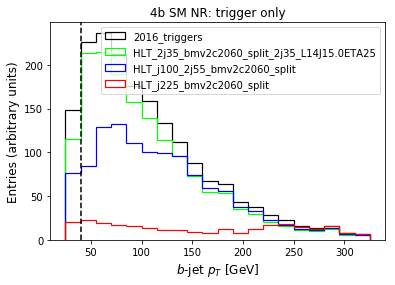

In [11]:
ptCols = ['resolvedJets_pt','resolvedJets_is_MV2c10_FixedCutBEff_70']
sfCols = ['mc_sf','resolvedJets_is_MV2c10_FixedCutBEff_70']

vRange = (25,325)
nBins = 20

for ti,c in zip(labels,colors):
    
    bjet_pts = np.concatenate([pts[btags==1] for _, (pts, btags) in miniNtuple.loc[miniNtuple[ti],ptCols].iterrows()], axis=0)
    bjet_ws = np.concatenate([[mc_sf]*sum(btags) for _, (mc_sf, btags) in miniNtuple.loc[miniNtuple[ti],sfCols].iterrows()], axis=0)
    
    plt.hist(bjet_pts,nBins,vRange,color=c,label=ti,histtype='step',linewidth=1.2,
             weights=bjet_ws)

        
plt.xlabel('$b$-jet $p_T$ [GeV]',fontsize=12)
plt.ylabel('Entries (arbitrary units)',fontsize=12)
plt.legend()
plt.title(title+': trigger only')

ylim = plt.ylim()
plt.plot([40]*2,ylim,'k--')
plt.ylim(ylim)

plt.savefig('{}/preSel_all_bjet_pt.pdf'.format(figDir),bbox_inches='tight')
plt.show()

Woah, the red curve is kind of interesting to me...

I think the thing I want to do *next* is break this down by the $p_T$ of the $b$-jets, and here it's technically easier to have an the approximation for the weights that I can apply.

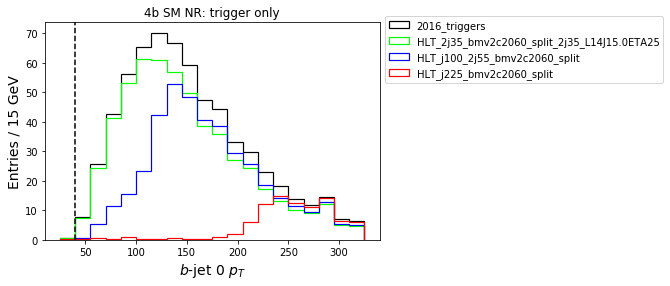

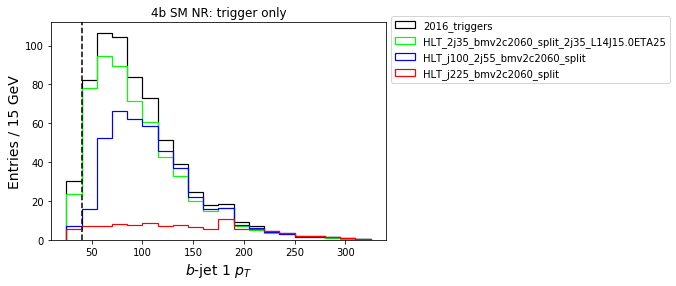

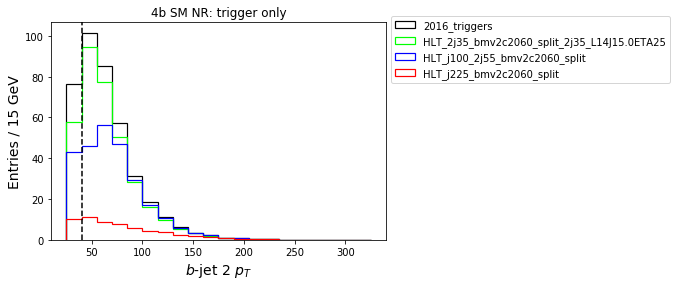

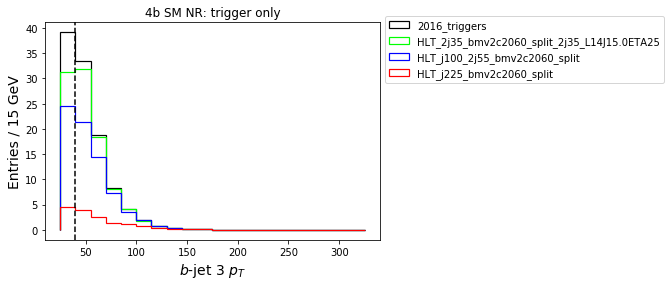

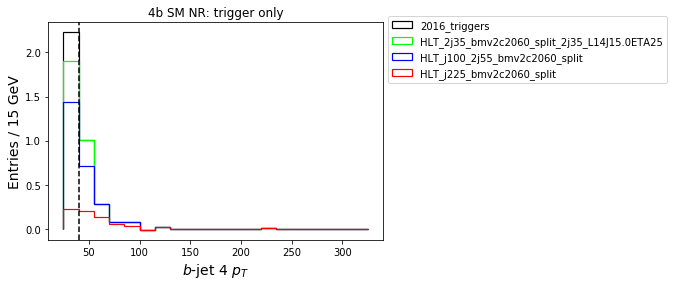

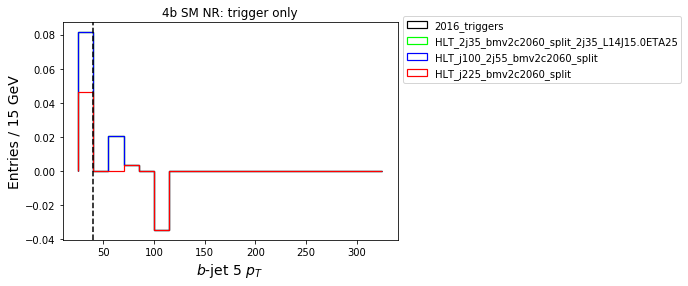

In [14]:
for jidx in range(6):
    
    plt.figure()
    
    for ti,c in zip(labels,colors):

        bpts = [pts[btags==1][jidx] for _, (pts, btags) in miniNtuple.loc[miniNtuple[ti],ptCols].iterrows() if sum(btags) > jidx ]
        bws  = [mc_sf for _, (mc_sf,  btags) in miniNtuple.loc[miniNtuple[ti],sfCols].iterrows() if sum(btags) > jidx ]
        
        plt.hist(bpts, nBins, vRange, color=c, label=ti, histtype='step', linewidth=1.2, weights=bws)

    plt.xlabel('$b$-jet {} $p_T$'.format(jidx),fontsize=14)
    plt.ylabel('Entries / 15 GeV',fontsize=14)
    plt.title(title+': trigger only')
    plt.legend(bbox_to_anchor=(1,1.05))
    
    ylim = plt.ylim()
    plt.plot([40]*2,ylim,'k--')
    plt.ylim(ylim)
    
    plt.savefig('{}/preSel_bjet{}_pt.pdf'.format(figDir,jidx),bbox_inches='tight')
    
    plt.show()

Interesting... I thought we'd be more likely to have six $b$-jets since the extra $b$s were probably most likely to come from $g \rightarrow b \bar{b}$, but apparently this is *not* the case.


Also, I'm finding it interesting that we have all of these categories.


Maybe it would be fun to see how these plots evolve when we apply more of the analysis selections?

After the four good $b-jets$ cut though, I only have four jets to consider.


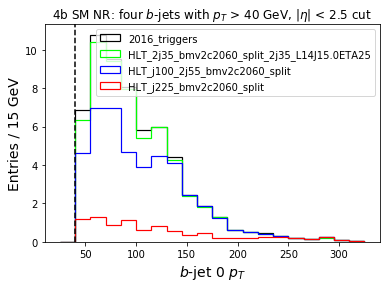

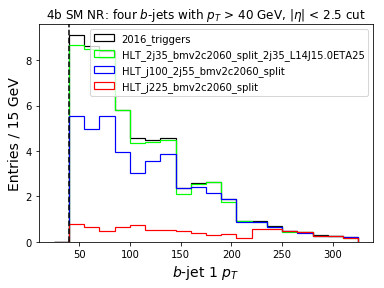

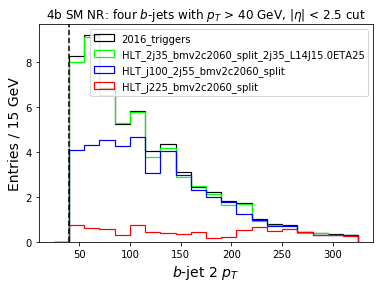

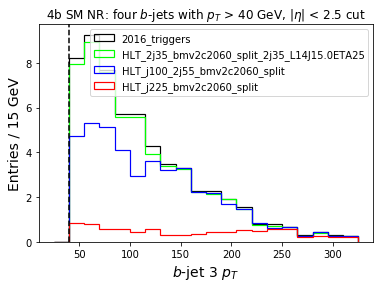

In [13]:
mask = miniNtuple.fourGoodJets & (df.nbtags >= 4)

for jidx in range(4):
    
    plt.figure()
    key = 'j{}_pT'.format(jidx)

    for ti,c in zip(labels,colors):

        plt.hist(miniNtuple.loc[mask & miniNtuple[ti], key], nBins, vRange, color=c, 
                 label=ti, histtype='step', linewidth=1.2, 
                 weights=miniNtuple.loc[mask & miniNtuple[ti], 'mc_sf'])

    plt.xlabel('$b$-jet {} $p_T$'.format(jidx),fontsize=14)
    plt.ylabel('Entries / 15 GeV',fontsize=14)
    plt.title(title+': four $b$-jets with $p_T$ > 40 GeV, $|\eta|$ < 2.5 cut')
    plt.legend()
    
    ylim = plt.ylim()
    plt.plot([40]*2,ylim,'k--')
    plt.ylim(ylim)
    
    plt.savefig('{}/fourGoodJets_bjet{}_pt_triggerStreams.pdf'.format(figDir,jidx),bbox_inches='tight')
    
    plt.show()
    